In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Gerando dados falsos
categorias = ['Eletrônicos', 'Roupas', 'Alimentos', 'Livros', 'Brinquedos']
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
num_registros = len(datas)

In [3]:
# Criando DataFrame
data = {
       'Data': np.random.choice(datas, num_registros),
       'Categoria': np.random.choice(categorias, num_registros),
       'Quantidade_Vendida': np.random.randint(1, 160, num_registros),
       'Preco_Unitario': np.round(np.random.uniform(10, 110, num_registros), 2)
   }
df = pd.DataFrame(data)
df['Valor_Total'] = df['Quantidade_Vendida'] * df['Preco_Unitario']

In [4]:
# Salvando o DataFrame em um arquivo CSV
df.to_csv('dados_vendas.csv', index=False)

print("Conjunto de dados gerado e salvo como 'dados_vendas.csv'.")

Conjunto de dados gerado e salvo como 'dados_vendas.csv'.


In [5]:
#Carregando dados CSV
df = pd.read_csv('dados_vendas.csv')

In [6]:
#Descobrir quantidade de linhas e colunas
df.shape

(365, 5)

**Pergunta 1: Quantas linhas e colunas existem no DataFrame carregado?**
Existem 365 linhas e 5 colunas

In [7]:
#Mostrar o tipo de dados
df.dtypes

Data                   object
Categoria              object
Quantidade_Vendida      int64
Preco_Unitario        float64
Valor_Total           float64
dtype: object

**Pergunta 2: Quais são os tipos de dados (dtypes) das colunas?**

Os dados das colunas são: data sendo um object, categoria sendo um object, quantidade vendida sendo int, preço unitario sendo float, valor total sendo float.

In [8]:
# Exibe as 5 primeiras linhas
print(df.head())

         Data   Categoria  Quantidade_Vendida  Preco_Unitario  Valor_Total
0  2023-10-13  Brinquedos                 153           52.87      8089.11
1  2023-05-25  Brinquedos                  52          109.46      5691.92
2  2023-04-24      Livros                 123           42.90      5276.70
3  2023-06-22      Roupas                  51           32.85      1675.35
4  2023-07-02      Livros                  54           13.11       707.94


In [9]:
# Quantidade de categorias unicas
categorias_unicas = df['Categoria'].unique()
numero_categorias = len(categorias_unicas)
print(f"Estão presentes {numero_categorias} categorias únicas de produto.")

Estão presentes 5 categorias únicas de produto.


In [10]:
eletronicos = df[df['Categoria'] == 'Eletrônicos']
print(eletronicos)

           Data    Categoria  Quantidade_Vendida  Preco_Unitario  Valor_Total
6    2023-07-11  Eletrônicos                  23           38.95       895.85
9    2023-11-12  Eletrônicos                  33           33.90      1118.70
13   2023-03-27  Eletrônicos                 146           84.14     12284.44
23   2023-06-23  Eletrônicos                 155           34.69      5376.95
25   2023-01-15  Eletrônicos                  85           91.94      7814.90
..          ...          ...                 ...             ...          ...
348  2023-11-19  Eletrônicos                  39           91.62      3573.18
350  2023-01-18  Eletrônicos                  36           73.05      2629.80
354  2023-02-13  Eletrônicos                 125           96.21     12026.25
360  2023-04-02  Eletrônicos                 118           67.36      7948.48
363  2023-08-20  Eletrônicos                 113           42.17      4765.21

[70 rows x 5 columns]


In [11]:
# Média do valor total das vendas na categoria 'Eletrônicos'?
agrupado_media = df.groupby('Categoria')['Valor_Total'].mean()

In [12]:
agrupado_media

Categoria
Alimentos      4658.316061
Brinquedos     5314.170909
Eletrônicos    4594.863857
Livros         4584.918571
Roupas         4212.797541
Name: Valor_Total, dtype: float64

**Pergunta 4: Qual é a média do valor total das vendas na categoria 'Eletrônicos'?**
A média d valor total das vendas da categoria eletrônicos é R$ 4751.63

In [13]:
# Filtrar as vendas acima de R$ 1000:
vendas_acima_1000 = df[df['Valor_Total'] > 1000]
print(vendas_acima_1000)

           Data    Categoria  Quantidade_Vendida  Preco_Unitario  Valor_Total
0    2023-10-13   Brinquedos                 153           52.87      8089.11
1    2023-05-25   Brinquedos                  52          109.46      5691.92
2    2023-04-24       Livros                 123           42.90      5276.70
3    2023-06-22       Roupas                  51           32.85      1675.35
5    2023-09-15   Brinquedos                  82           78.56      6441.92
..          ...          ...                 ...             ...          ...
360  2023-04-02  Eletrônicos                 118           67.36      7948.48
361  2023-01-11       Roupas                  46           50.70      2332.20
362  2023-06-15   Brinquedos                  59           72.05      4250.95
363  2023-08-20  Eletrônicos                 113           42.17      4765.21
364  2023-04-24       Livros                  85           55.89      4750.65

[315 rows x 5 columns]


In [14]:
categorias_unicas = df['Categoria'].unique()
numero_categorias = len(categorias_unicas)
print(f"Estão presentes {numero_categorias} categorias únicas de produto.")

Estão presentes 5 categorias únicas de produto.


In [15]:
vendas_acima_1000 = df[df['Valor_Total'] > 1000]
quantidade_vendas_acima_1000 = len(vendas_acima_1000)
print(quantidade_vendas_acima_1000)

315



**Pergunta 5: Quantas vendas acima de R$ 1000 ocorreram?**

Houve 355 vendas com valor cima de R$ 1000.



In [16]:
##**Agrupar os dados por categoria e calcular o total de vendas por categoria:##
total_por_categoria = df.groupby('Categoria')['Valor_Total'].sum().reset_index()
print(total_por_categoria)


     Categoria  Valor_Total
0    Alimentos    307448.86
1   Brinquedos    409191.16
2  Eletrônicos    321640.47
3       Livros    417227.59
4       Roupas    256980.65


**Pergunta 6: Qual categoria teve o maior valor total de vendas?**

A categoria que teve o maior valor de vendas foi de eletrônico


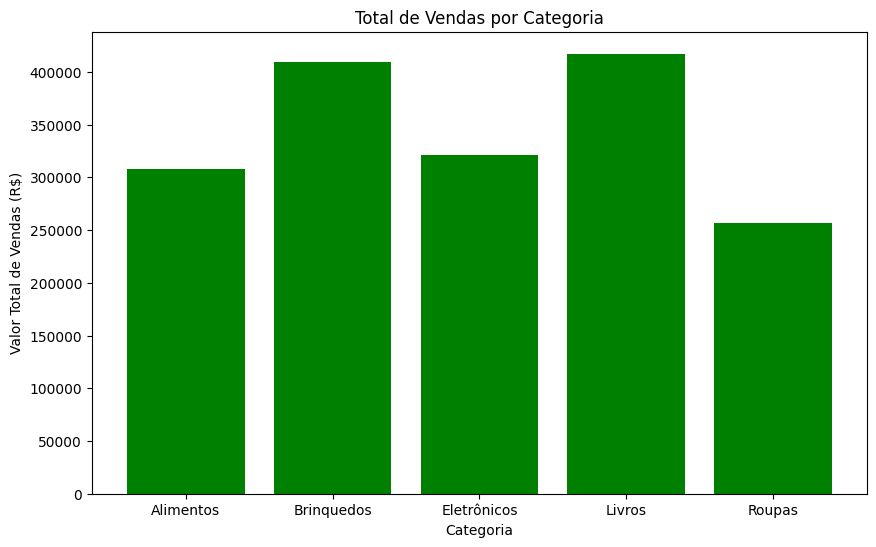

In [17]:
##Criar um gráfico de barras mostrando o total de vendas por categoria:

plt.figure(figsize=(10, 6))
plt.bar(total_por_categoria['Categoria'], total_por_categoria['Valor_Total'], color='green')
plt.xlabel('Categoria')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Total de Vendas por Categoria')
plt.show()